In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
df['Churn'].replace({'No':0, 'Yes':1}, inplace=True)

A)
    1. Which features and variables are best to help determine which customer is at high risk of churning?
    2. stakeholders will benefit from this narrowing the variability of which customer possibly churning 
    3. churn column, monthly charge, tenure, 8 survey questions( timely response, timely fixes, timely replacements, reliability, options, respectful response, courteous exchange, evidence of active listening)


In [5]:
# B1) Chi-square

contingency= pd.crosstab(df['Churn'], df['Item1'])
contingency

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
0,158,1002,2562,2473,994,146,15
1,66,391,886,885,365,53,4


In [6]:
contingency_pct= pd.crosstab(df['Churn'],df['Item1'], normalize='index')
contingency_pct

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
0,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
1,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


<AxesSubplot:xlabel='Item1', ylabel='Churn'>

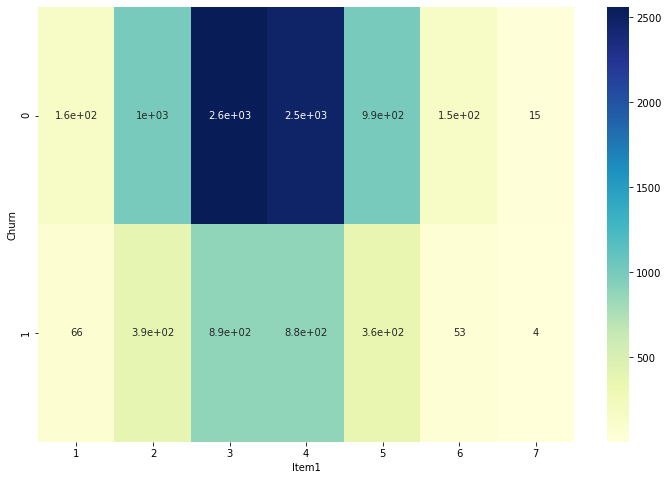

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [8]:
# B2)
c,p, dof, expected = chi2_contingency(contingency)
print(p)

0.6318335816054494


In [9]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
        print('Dependent (reject H0)')
else:
        print('Independent (H0 holds true)')

p value is 0.6318335816054494
Independent (H0 holds true)


<AxesSubplot:>

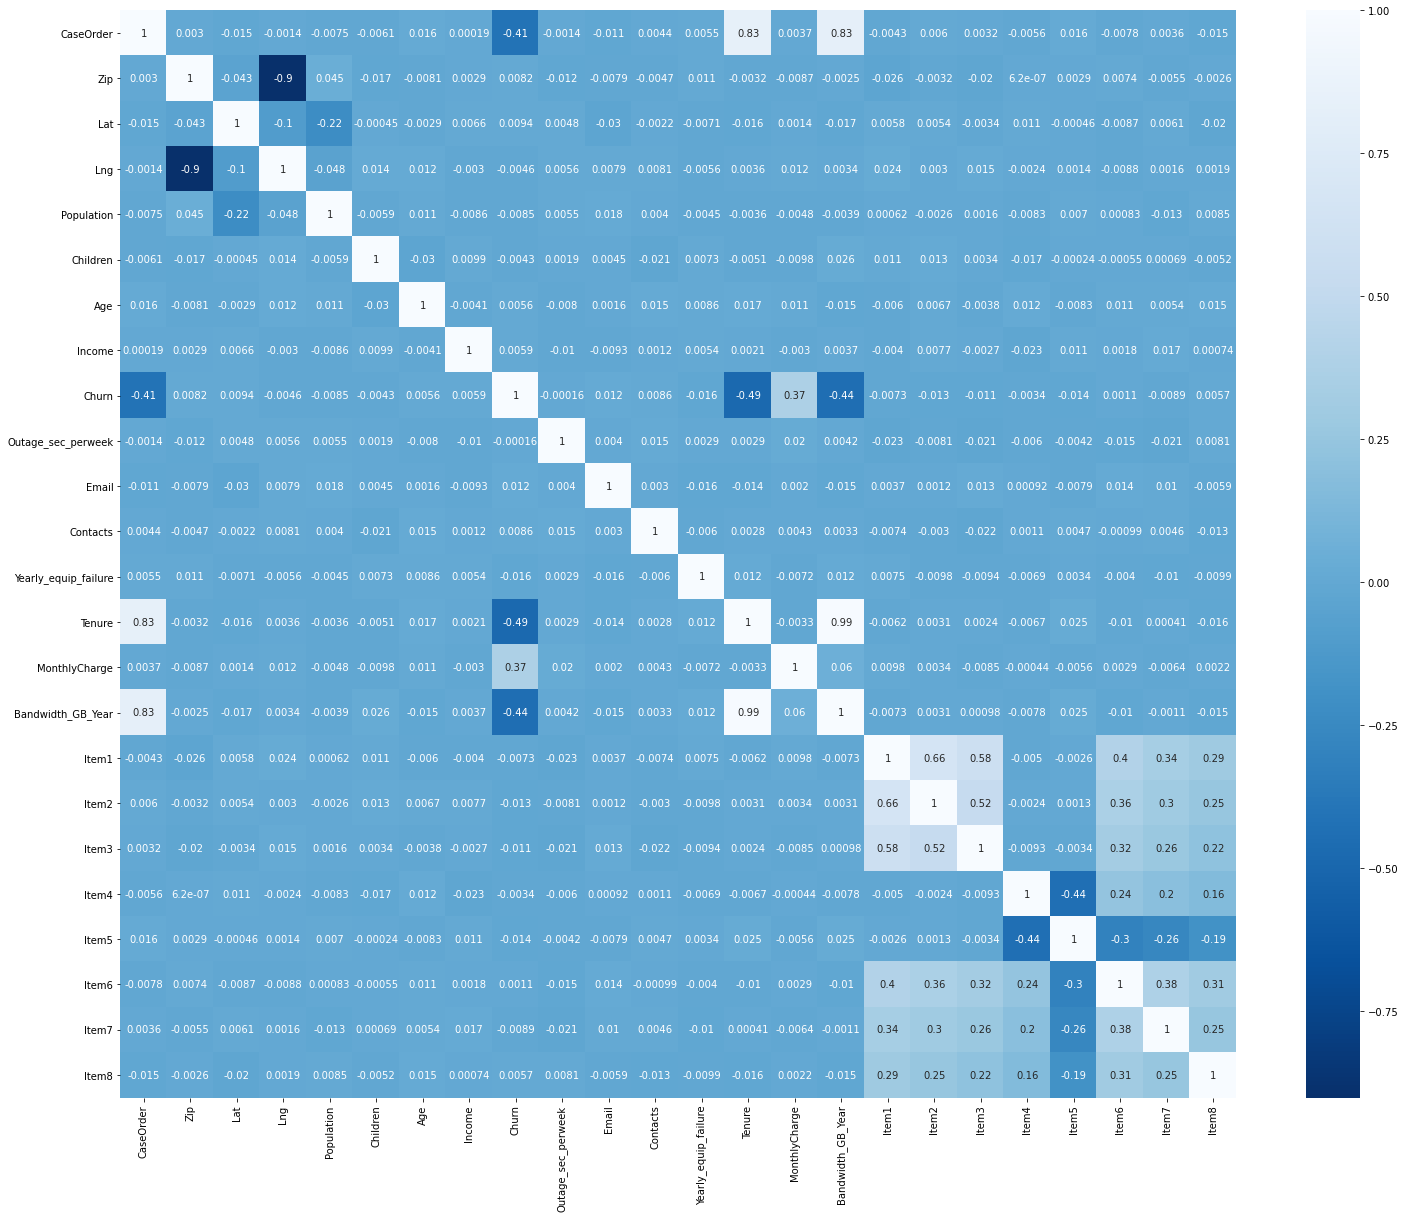

In [10]:
corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='Blues_r', annot=True)

 B3)
 Chi-square was chosen for the analysis of determining which customers are likely to churn using categorical variables. The 'Churn' column which is binomial and 'Item1' for timely responses were used to test for independence. Because we are working with two categorical variables, chi-square test is effective at comparing them to help identify randomness or other underlying affect. (Wood, 2020)


C) Univariate
Continuous variables:
    -MonthlyCharge
    -Outage_sec_perweek
Categorical Variables:
    -Item1
    -Item3

In [11]:
# C1)
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [12]:
import matplotlib.pyplot as plt

(array([ 224., 1393.,    0., 3448.,    0., 3358., 1359.,    0.,  199.,
          19.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

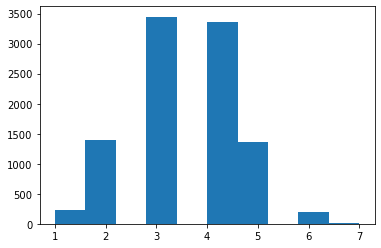

In [13]:
plt.hist(df['Item1'])

(array([2.020e+02, 1.424e+03, 3.435e+03, 0.000e+00, 3.410e+03, 1.313e+03,
        0.000e+00, 2.030e+02, 1.200e+01, 1.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

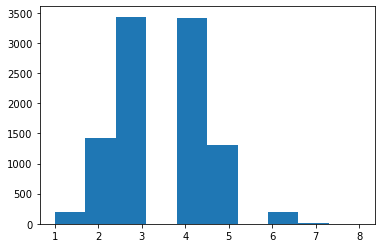

In [14]:
plt.hist(df['Item3'])

(array([ 230.,  853., 1695., 2034., 1842., 1089.,  926.,  791.,  388.,
         152.]),
 array([ 79.97886  , 100.9970159, 122.0151718, 143.0333277, 164.0514836,
        185.0696395, 206.0877954, 227.1059513, 248.1241072, 269.1422631,
        290.160419 ]),
 <BarContainer object of 10 artists>)

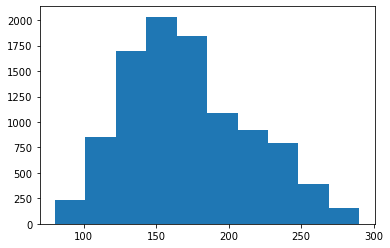

In [15]:
plt.hist(df['MonthlyCharge'])

(array([  42.,  245.,  876., 1919., 2804., 2357., 1240.,  413.,   94.,
          10.]),
 array([ 0.09974694,  2.21049525,  4.32124355,  6.43199186,  8.54274016,
        10.65348847, 12.76423678, 14.87498508, 16.98573339, 19.09648169,
        21.20723   ]),
 <BarContainer object of 10 artists>)

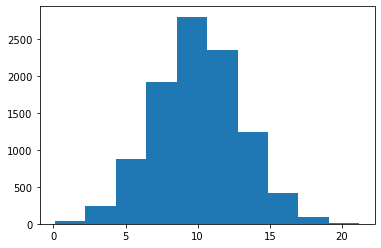

In [16]:
plt.hist(df['Outage_sec_perweek'])

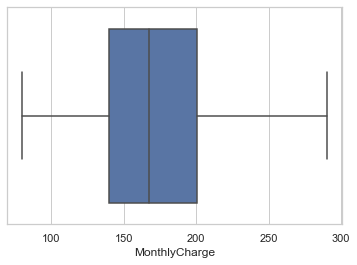

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["MonthlyCharge"])

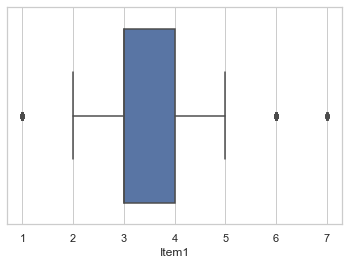

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Item1"])

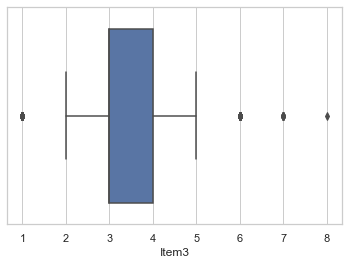

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Item3"])

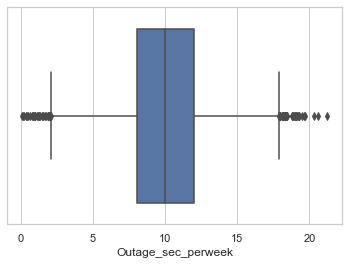

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Outage_sec_perweek"])

D) Bivariate
Continuous Variables:
    -Outage_sec_perweek
    -Bandwidth_GB_Year
Categorical Variable
    -Item1
    -Item3

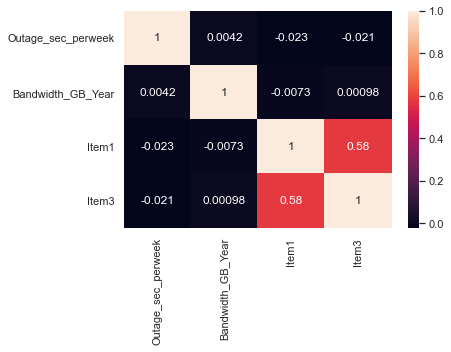

In [21]:
# D1)
churn_bivariate = df[['Outage_sec_perweek', 'Bandwidth_GB_Year', 'Item1', 'Item3']]
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

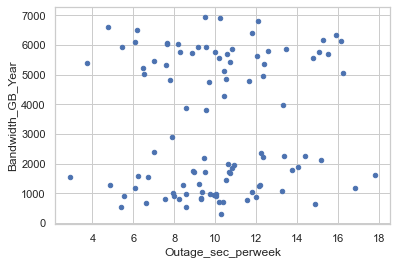

In [22]:
churn_bivariate[churn_bivariate['Outage_sec_perweek'] < 22].sample(100).plot.scatter(x='Outage_sec_perweek', 
                                                                                     y='Bandwidth_GB_Year')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Item1', ylabel='Item3'>

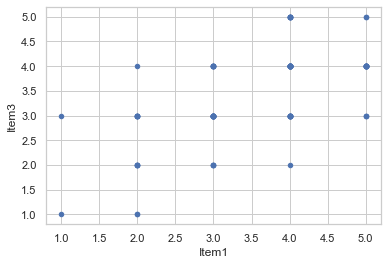

In [23]:
churn_bivariate[churn_bivariate['Item1'] < 10].sample(100).plot.scatter(x='Item1', 
                                                                        y='Item3')

In [24]:
pd.set_option('display.max_rows', df.shape[0]+1)
df[['State','Gender','Churn']].groupby(['State','Gender']).agg(['mean','count'])

Churn      
                     mean count
State Gender                   
AK    Female     0.279070    43
      Male       0.333333    33
      Nonbinary  0.000000     1
AL    Female     0.200000    80
      Male       0.260417    96
      Nonbinary  0.200000     5
AR    Female     0.300000    90
      Male       0.202381    84
      Nonbinary  0.000000     2
AZ    Female     0.236364    55
      Male       0.277778    54
      Nonbinary  0.333333     3
CA    Female     0.271777   287
      Male       0.260870   230
      Nonbinary  0.000000     9
CO    Female     0.210526    76
      Male       0.297297    74
      Nonbinary  0.000000     5
CT    Female     0.324324    37
      Male       0.375000    32
      Nonbinary  0.500000     2
DC    Female     0.714286     7
      Male       0.285714     7
DE    Female     0.400000    10
      Male       0.200000    10
      Nonbinary  0.000000     1
FL    Female     0.174497   149
      Male       0.267857   168
      Nonbinary  0.000000     7
GA    Female     0.261261   111
      Male       0.276423   123
      Nonbinary  0.250000     4
HI    Female     0.222222    18
      Male       0.125000    16
      Nonbinary  0.000000     1
IA    Female     0.280000   125
      Male       0.270270   148
      Nonbinary  0.000000     6
ID    Female     0.227273    44
      Male       0.235294    34
      Nonbinary  0.000000     3
IL    Female     0.228155   206
      Male       0.256410   195
      Nonbinary  0.333333    12
IN    Female     0.285714   126
      Male       0.267857   112
      Nonbinary  0.666667     3
KS    Female     0.287356    87
      Male       0.272727    99
      Nonbinary  0.555556     9
KY    Female     0.275000   120
      Male       0.276786   112
      Nonbinary  0.333333     6
LA    Female     0.308824    68
      Male       0.239437    71
      Nonbinary  1.000000     2
MA    Female     0.241379    87
      Male       0.228916    83
      Nonbinary  0.500000     2
MD    Female     0.359375    64
      Male       0.283019    53
      Nonbinary  0.000000     6
ME    Female     0.264151    53
      Male       0.321429    56
      Nonbinary  0.000000     3
MI    Female     0.255474   137
      Male       0.304348   138
      Nonbinary  0.750000     4
MN    Female     0.226950   141
      Male       0.177966   118
      Nonbinary  0.400000     5
MO    Female     0.243056   144
      Male       0.333333   156
      Nonbinary  0.100000    10
MS    Female     0.281250    64
      Male       0.283333    60
      Nonbinary  0.000000     2
MT    Female     0.295455    44
      Male       0.300000    50
      Nonbinary  0.500000     2
NC    Female     0.263158   152
      Male       0.237705   122
      Nonbinary  0.666667     6
ND    Female     0.298507    67
      Male       0.224490    49
      Nonbinary  0.500000     2
NE    Female     0.144330    97
      Male       0.280488    82
      Nonbinary  0.500000     2
NH    Female     0.204545    44
      Male       0.250000    40
      Nonbinary  1.000000     1
NJ    Female     0.239130    92
      Male       0.329670    91
      Nonbinary  0.000000     7
NM    Female     0.314815    54
      Male       0.250000    56
      Nonbinary  0.250000     4
NV    Female     0.120000    25
      Male       0.227273    22
      Nonbinary  0.000000     1
NY    Female     0.225694   288
      Male       0.273077   260
      Nonbinary  0.100000    10
OH    Female     0.226744   172
      Male       0.314607   178
      Nonbinary  0.222222     9
OK    Female     0.273585   106
      Male       0.279570    93
      Nonbinary  0.000000     4
OR    Female     0.283333    60
      Male       0.229167    48
      Nonbinary  0.500000     6
PA    Female     0.233898   295
      Male       0.274590   244
      Nonbinary  0.090909    11
PR    Female     0.222222    18
      Male       0.300000    20
      Nonbinary  0.000000     2
RI    Female     0.181818    11
      Male       0.000000     7
      Nonbinary  0.000000     1
SC    Female     0.1

In [25]:
df[['Churn','MonthlyCharge']].groupby('Churn').mean()

,MonthlyCharge
Churn,
0,163.008973
1,199.295175


In [26]:
df[['Gender','Churn']].groupby(['Gender']).agg(['mean','count'])

Churn      
               mean count
Gender                   
Female     0.253134  5025
Male       0.278035  4744
Nonbinary  0.255411   231

E)
    1) After performing the chi-square test it was found that the p-value = 0.6318335816054494 and with a 0.05 alpha level we fail to reject the null. Meaning that customer churn and customer survey for item1 is independent of each other.
    2) Based on looking at the correlation heatmap we can see that there is not a big correlation between customer churn and the variables. Among all the variables there is not big correlation with each other, thus the data stuck at providing meaningful insights. 
    3) From our analysis we may need to look more closely with the monthly charge for customers as well as access the survey questions. The survey variables show a small correlation among each other, and the monthly charge show a small correlation among churn rates. But also we need to continue to explore other approaches with the data and from different perspectives, (Yıldırım, 2020). 

F) Panopto Video

G) Third-party code references
    1) Gudikandula, P. (2021, March 1). Exploratory Data Analysis(beginner)&nbsp;, Univariate&nbsp;, Bivariate and Multivariate - Habberman dataset. Medium. https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751. 
    2) Yıldırım, S. (2020, September 3). A Practical Guide for Exploratory Data Analysis - Churn Dataset. Medium. https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-churn-dataset-508b6da2d594. 

H) in-text citations
    1) Wood, R. (2020, August 25). The Chi-Squared Test Statistic is a Must For Every Data Scientist: A Case Study in Customer Churn. Medium. https://towardsdatascience.com/the-chi-squared-test-statistic-is-a-must-for-every-data-scientist-a-case-study-in-customer-churn-bcdb17bbafb7. 
    2) Yıldırım, S. (2020, September 3). A Practical Guide for Exploratory Data Analysis - Churn Dataset. Medium. https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-churn-dataset-508b6da2d594. 